In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
import math as Math

In [3]:
df_from_json = pd.read_json('DataSets/SciFi_200000_AllHits.json')

In [4]:
df_from_json[[ 'Hit_LHCbID','Hit_Xat0', 'Hit_Zat0','Hit_dxDy','Hit_dzDy','Hit_planeCode','Hit_isX','Hit_zone']]

,Hit_LHCbID,Hit_Xat0,Hit_Zat0,Hit_dxDy,Hit_dzDy,Hit_planeCode,Hit_isX,Hit_zone
0,271034,-2463.609863,7825.999512,0.0,0.003601,0,True,0
1,271037,-2462.859863,7825.999512,0.0,0.003601,0,True,0
2,271770,-2275.410156,7825.999512,0.0,0.003601,0,True,0
3,271773,-2274.785156,7825.999512,0.0,0.003601,0,True,0
4,271809,-2265.440186,7825.999512,0.0,0.003601,0,True,0
5,268491,-2061.064941,7825.999512,0.0,0.003601,0,True,0
6,268548,-2046.209961,7825.999512,0.0,0.003601,0,True,0
7,268551,-2045.584961,7825.999512,0.0,0.003601,0,True,0
8,268592,-2035.334961,7825.999512,0.0,0.003601,0,True,0
9,268595,-2034.584961,7825.999512,0.0,0.003601,0,True,0


In [5]:
# Data columns
i = 0
for val in df_from_json.columns:
    print(i," ",val)
    i = i + 1

0   Event
1   Hit_LHCbID
2   Hit_Xat0
3   Hit_YMax
4   Hit_YMin
5   Hit_Zat0
6   Hit_dxDy
7   Hit_dzDy
8   Hit_isX
9   Hit_planeCode
10   Hit_w
11   Hit_zone
12   run


In [6]:
# Get values, thus converting it to arrays
hits = df_from_json.values

In [7]:
# Extraction of the layers from the dataset
# It has the following structure
# E.g. For station 1: [[Zone_0, Zone_1], [Zone_2,Zone3], [Zone_4,Zone_5], [Zone_6, Zone_7]]
def createStationLayers(station):
    station_layers = []
    zone = (station - 1) * 8 
    for index in range(4):
        layer = []
        station_layers.append(hits[((hits[:,57] > (zone - 1)) & (hits[:,57] < zone + 2))])
        zone = zone + 2
    return station_layers

In [8]:
def show2DPlotHits(hitSet, elev, angle, max):
    
    # Get the different keys from all hits (And discard the repeated ones)
    particleIds = np.unique(hitSet[:,1])
    np.random.shuffle(particleIds)
    
    fig = plt.figure(figsize=(19, 8))
    ax = fig.add_subplot(111)
    
    max_layers = 12
    per_layer = Math.ceil(max / max_layers)
    actual_layer = 0
    actual_hit = 0
    # Iterate through all the particles keys obtained 
    for particle in particleIds:

        # Get all hits from the given particle key
        particleHits = hitSet[np.where(hitSet[:,1] == particle)]

        # Extract X,Y and Z from the particle hits
        X = [x for x in particleHits[:,2]]
        Y = [x for x in particleHits[:,5]]

        ax.scatter(X, Y, s=3)

        actual_hit = actual_hit + 1
        if actual_hit == per_layer:
            actual_layer = actual_layer + 1
            if actual_layer == max_layers:
                break;
            actual_hit = 0
            continue;
        
    ax.grid()
    plt.show()
    # Plot the surface.
    ax.grid()
    plt.show()

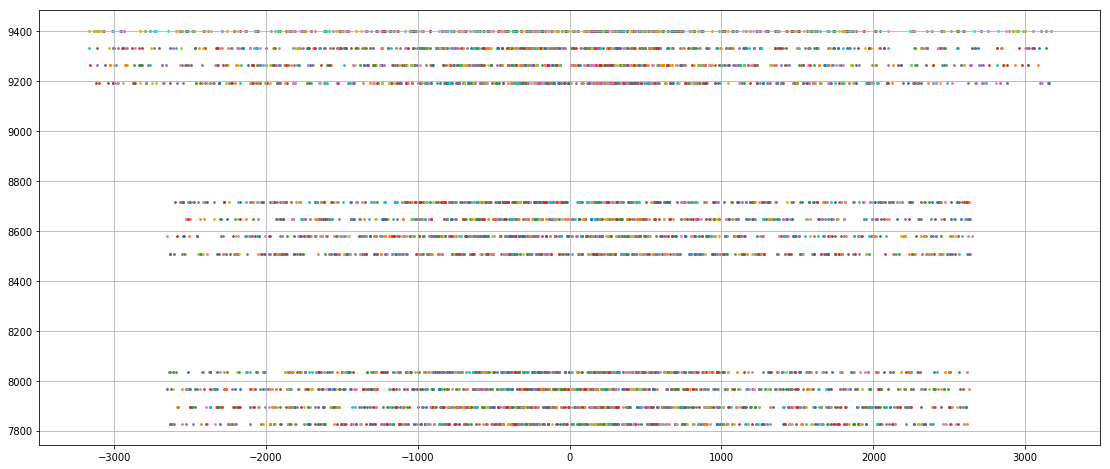

In [9]:
show2DPlotHits(hits, 90, 0, 5000)